## Content
- **Array splitting and Merging**
    - Splitting arrays - `split()`, `hsplit()`, `vsplit()`
    - Merging Arrays - `hstack()`, `vstack()`, `concatenate()`

- **Broadcasting**
    - `np.tile()` 

- **Dimension Expansion and Reduction**
    - `np.expand_dims()`
    - `np.newaxis`
    - `np.sqeeze()`

- **Shallow vs Deep Copy**
    - `view()`
    - `copy()`
    - `copy.deepcopy()`






## Array Splitting and Merging



- In addition to reshaping and selecting subarrays, it is often necessary to split arrays into smaller arrays or  merge arrays into bigger arrays, 


- **For example**, when joining separately computed or measured data series into a **higher-dimensional array**, such as a matrix. 


### Splitting
#### `np.split()`

- Splits an array into multiple sub-arrays as views


#### It takes an argument `indices_or_sections`

- If `indices_or_sections` is an **integer, n**, the array will be **divided into n equal arrays along axis**. 

- If such a split is not possible, an error is raised.

- If `indices_or_sections` is a **1-D array of sorted integers**, the entries indicate **where along axis the array is split**. 

- If an index **exceeds the dimension of the array along axis**, an **empty sub-array is returned** correspondingly.

In [ ]:
x = np.arange(9)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
np.split(x, 3)

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]

In [ ]:
np.split(x, [3, 5, 6])

[array([0, 1, 2]), array([3, 4]), array([5]), array([6, 7, 8])]

#### `np.hsplit()`

- Splits an array into multiple sub-arrays **horizontally (column-wise)**.

In [ ]:
x = np.arange(16.0).reshape(4, 4)
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

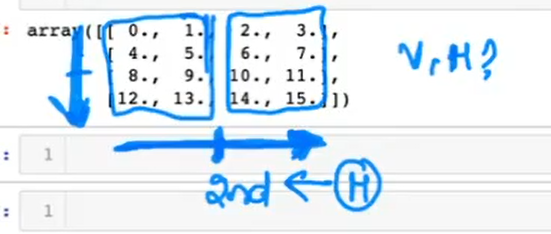

#### Think of it this way:

- There are 2 axis to a 2-D array
    1. **1st axis - Vertical axis**
    2. **2nd axis - Horizontal axis**

#### Along which axis are we splitting the array?

- The split we want happens across the **2nd axis (Horizontal axis)**


- That is why we use `hsplit()`


#### So, try to think in terms of "whether the operation is happening along vertical axis or horizontal axis"

- We are splitting the horizontal axis in this case

In [ ]:
np.hsplit(x, 2)

[array([[ 0.,  1.],
        [ 4.,  5.],
        [ 8.,  9.],
        [12., 13.]]), array([[ 2.,  3.],
        [ 6.,  7.],
        [10., 11.],
        [14., 15.]])]

In [ ]:
np.hsplit(x, np.array([3, 6]))

[array([[ 0.,  1.,  2.],
        [ 4.,  5.,  6.],
        [ 8.,  9., 10.],
        [12., 13., 14.]]), array([[ 3.],
        [ 7.],
        [11.],
        [15.]]), array([], shape=(4, 0), dtype=float64)]

#### `np.vsplit()`

- Splits an array into multiple sub-arrays **vertically (row-wise)**.

In [ ]:
x = np.arange(16.0).reshape(4, 4)
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

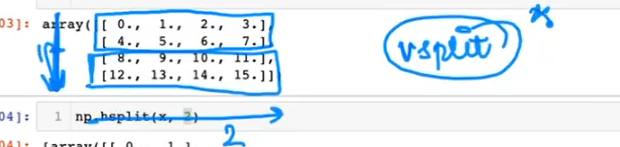

#### Now, along which axis are we splitting the array?

- The split we want happens across the **1st axis (Vertical axis)**


- That is why we use `vsplit()`


#### Again, always try to think in terms of "whether the operation is happening along vertical axis or horizontal axis"

- We are splitting the vertical axis in this case

In [ ]:
np.vsplit(x, 2)

[array([[0., 1., 2., 3.],
        [4., 5., 6., 7.]]), array([[ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])]

In [ ]:
np.vsplit(x, np.array([3]))

[array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]]), array([[12., 13., 14., 15.]])]

### Stacking
#### Let's say we have an array and we want to stack it like this:



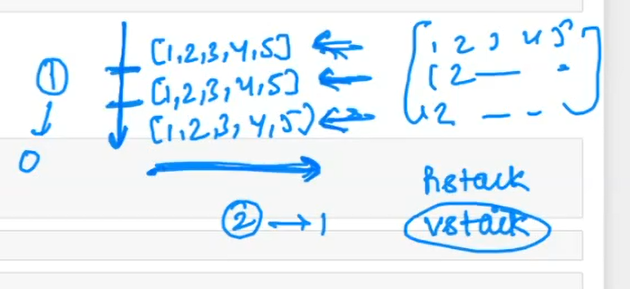

#### Will we use `vstack()` or `hstack()`?

#### Along which axis the operation is happening?

- Vertical axis

- So, we'll use `vstack()`

#### `np.vstack()`

- Stacks a list of arrays **vertically (along axis 0 or 1st axis)**


- For **example**, **given a list of row vectors, appends the rows to form a matrix**.

In [ ]:
data = np.arange(5)
data

array([0, 1, 2, 3, 4])

In [ ]:
np.vstack((data, data, data))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### Now, What if we want to stack the array like this?

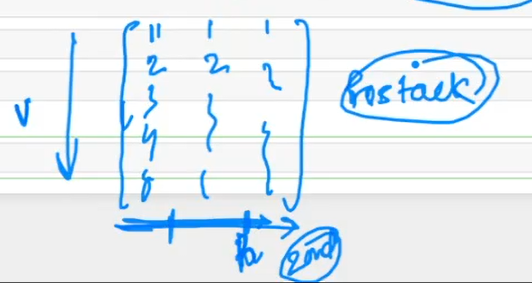

- Operation or **change is happening along horizontal axis**

- So, we'll use `hstack()`

#### `np.hstack()`

- Stacks a list of arrays horizontally (along axis 1)

- For **example**, **given a list of column vectors, appends the columns to form a matrix**.

In [ ]:
data = np.arange(5).reshape(5,1)
data

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [ ]:
np.hstack((data, data, data))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])


#### Question: Now, What will be the output of this?

```
a = np.array([[1], [2], [3]])
b = np.array([[4], [5], [6]])
np.hstack((a, b))
```


In [ ]:
a = np.array([[1], [2], [3]])
a

array([[1],
       [2],
       [3]])

In [ ]:
b = np.array([[4], [5], [6]])
b 

array([[4],
       [5],
       [6]])

In [ ]:
np.hstack((a, b))

array([[1, 4],
       [2, 5],
       [3, 6]])

#### This time both `a` and `b` are column vectors 

- So, the stacking of `a` and `b` along horizontal axis is more clearly visible

#### Now, Let's look at a more generalized way of stacking arrays

### `np.concatenate()`

- Creates a new array by appending arrays after each other, along a given axis

- Provides similar functionality, but it takes a **keyword argument `axis`** that specifies the **axis along which the arrays are to be concatenated**.

#### Input array to `concatenate()` needs to be of dimensions atleast equal to the dimensions of output array

In [ ]:
z = np.array([[2, 4]])
z

array([[2, 4]])

In [ ]:
z.ndim

2

In [ ]:
zz = np.concatenate([z, z], axis=0)
zz

array([[2, 4],
       [2, 4]])

In [ ]:
zz = np.concatenate([z, z], axis=1)
zz

array([[2, 4, 2, 4]])

#### Let's look at a few more examples using `np.concatenate()`

#### Question: What will be the output of this?
```
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)
```

In [ ]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [ ]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [ ]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

#### Now, How did it work?

- Dimensions of `a` is $2\times2$

#### What is the dimensions of `b` ?

- 1-D array ?? - **NO**

- Look carefully!!

- **`b` is a 2-D array of dimensions $1\times2$**

#### `axis = 0` ---> It's a vertical axis

- So, **changes will happen along vertical axis**

- So, **`b` gets concatenated below `a`**

#### Now, What if we do NOT provide an axis along which to concatenate?



In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=None)

array([1, 2, 3, 4, 5, 6])

#### Can you see what happened here?

- When we **don't specify the axis (`axis=None`)**, `np.concatenate()` **flattens the arrays and concatenates them as 1-D row array**

## Broadcasting 




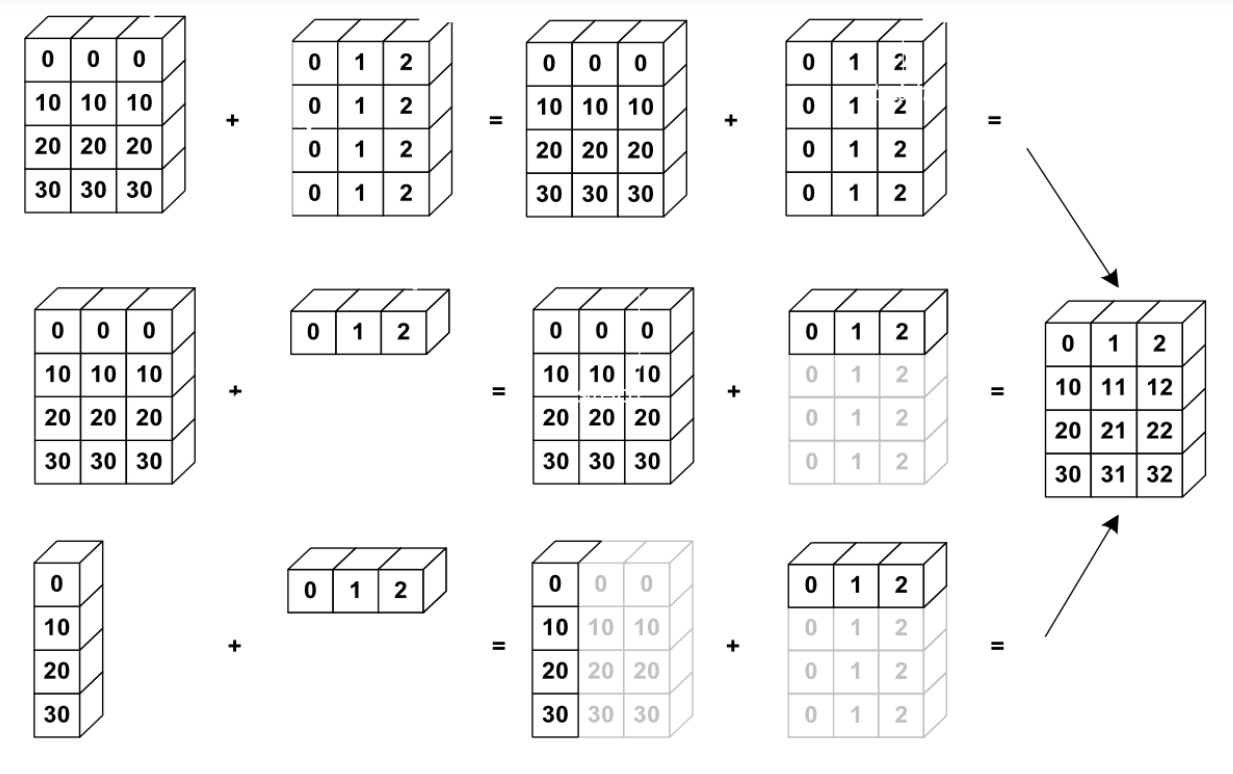

#### Case1: 
You are given two 2D array 

```
[[0,   0,  0],      [[0, 1, 2],
 [10, 10, 10], and   [0, 1, 2],
 [20, 20, 20],       [0, 1, 2],
 [30, 30, 30]]       [0, 1, 2]]

```
Shape of **first array** is **4x3**

Shape of **second array** is **4x3**.

Will addtion of these array be possible? Yes as the shape of these two array matches.



In [ ]:
a = np.tile(np.arange(0,40,10), (3,1))
a

array([[ 0, 10, 20, 30],
       [ 0, 10, 20, 30],
       [ 0, 10, 20, 30]])

**`np.tile` function is used to repeat the given array multiple times**

In [ ]:
np.tile(np.arange(0,40,10), (3,2))

array([[ 0, 10, 20, 30,  0, 10, 20, 30],
       [ 0, 10, 20, 30,  0, 10, 20, 30],
       [ 0, 10, 20, 30,  0, 10, 20, 30]])

Now, let's get back to example: 

In [ ]:
a

array([[ 0, 10, 20, 30],
       [ 0, 10, 20, 30],
       [ 0, 10, 20, 30]])

In [ ]:
a = a.T

In [ ]:
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [ ]:
b = np.tile(np.arange(0,3), (4,1))

In [ ]:
b

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

Let's add these two arrays:

In [ ]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Text book case of element wise addition of two 2D arrays.


#### Case2 : 

Imagine a array like this:

```

[[0,   0,  0],     
 [10, 10, 10],  
 [20, 20, 20],       
 [30, 30, 30]]

```
I want to add the following array to it:

```
 [[0, 1, 2]]

```

Is it possible? **Yes!**

What broadcasting does is replicate the second array row wise 4 times to fit the size of first array.

Here both array have same number of columns

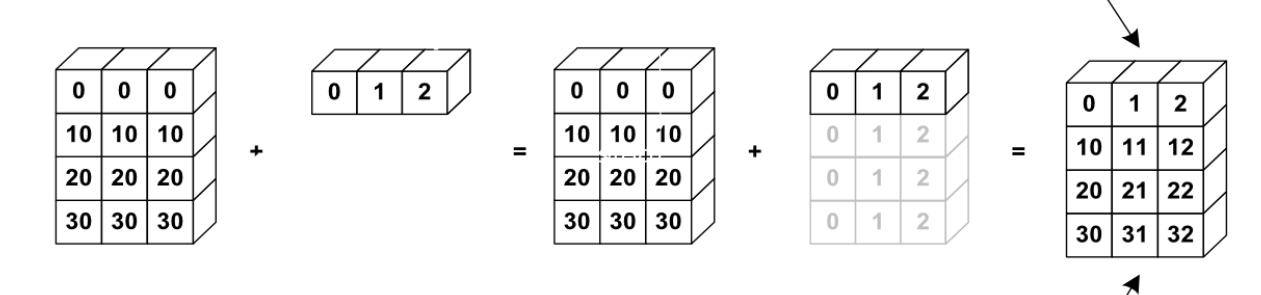

In [ ]:
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [ ]:
b = np.arange(0,3)
b

array([0, 1, 2])

In [ ]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

The **smaller array is broadcast across the larger array** so that they have **compatible shapes**. 


#### Case 3: 

Imagine I have two array like this:

```
     [[0],
     [10],
     [20],
     [30]]

```
and 

```
  [[0, 1, 2]]

```

i.e. one column matrix and one row matrix. 

When we try to add these array up, broadcasting will replicate first array column wise 3 time and secord array row wise 4 times to match up the shape.



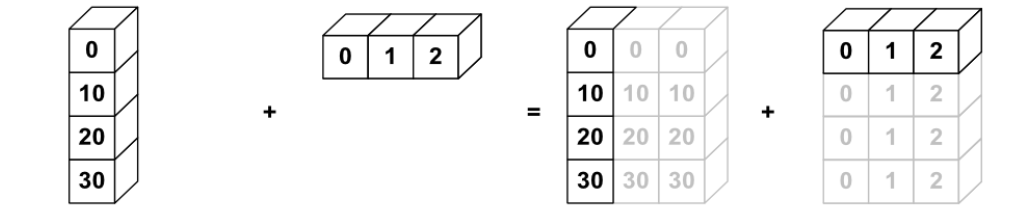

In [ ]:
a = np.arange(0,40,10)
a

array([ 0, 10, 20, 30])

This is a 1D row wise array, But we want this array colum wise? How do we do it ?
Reshape? 

In [ ]:
a = a.reshape(4,1)
a

array([[ 0],
       [10],
       [20],
       [30]])

In [ ]:
b = np.arange(0,3)
b

array([0, 1, 2])

In [ ]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

#### Question: (for general broadcasting rules)

What will be the output of the following? 
```
a = np.arange(8).reshape(2,4)
b = np.arange(16).reshape(4,4)

print(a*b)
```



In [ ]:
a = np.arange(8).reshape(2,4)
a

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [ ]:
b = np.arange(16).reshape(4,4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
a + b

ValueError: operands could not be broadcast together with shapes (2,4) (4,4) 

#### Why didn't it work? 

To understand this, let's learn about some **General Broadcasting Rules**

    For each dimension ( going from right side)
        1. The size of each dimension should be same OR
        2. The size of one dimension should be 1


##### Rule 1 : If two array differ in the number of dimensions, the shape of one with fewer dimensions is padded with ones on its leading( Left Side).

##### Rule 2 : If the shape of two arrays doesnt match in any dimensions, the array with shape equal to 1 is stretched to match the other shape.

##### Rule 3 : If in any dimesion the sizes disagree and neither equal to 1 , then Error is raised.





In the above example, the shapes were (2,4) and (4,4). 

Let's compare the dimension from right to left

- First, it will compare the right most dimension (4) which are equal.


- Next, it will compare the left dimension i.e. 2 and 4. 
    - Both conditions fail here. They are neither equal nor one of them is 1. 
    
Hence, it threw an error while broadcasting.


#### Now, Let's take a look at few more examples



#### Question : Will broadcasting work in this case ? 
```
A = np.arange(1,10).reshape(3,3)
B = np.array([-1, 0, 1]) 
A * B
```

In [ ]:
A = np.arange(1,10).reshape(3,3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
B = np.array([-1, 0, 1])
B

array([-1,  0,  1])

In [ ]:
A * B

array([[-1,  0,  3],
       [-4,  0,  6],
       [-7,  0,  9]])

#### Why did `A * B` work in this case?

- `A` has 3 rows and 3 columns i.e. (3,3)

- `B` is a 1-D vector with 3 elements (3,)

Now, if you look at **rule 1**

```
Rule 1 : If two array differ in the number of dimensions,
the shape of one with fewer dimensions is padded with ones on its leading( Left Side).

```

#### What is the shape of A and B ? 

- A has a shape of (3,3)
- B has a shape of (3,)

As per the rule 1, 
- the shape of array with fewer dimensions will be prefixed with ones on its leading side.

<br> 

Here, shape of B will be prefixed with 1

- So, it's shape will become (1,3)

#### Can we add a (3,3) and (1,3) array ? 

We check the validity of broadcasting. i.e. if broadcasting is possible or not.

Checking the dimension from right to left.
- It will compare the right most dimension (3); which are equal
- Now, it compares the leading dimension. 
    - The size of one dimension is 1. 

Hence, broadcasting condition is satisfied

<br>

#### How will it broadcast? 

As per rule 2:

```
Rule 2 : 
If the shape of two arrays doesnt match in any dimensions, 
the array with shape equal to 1 is stretched to match the other shape.
```

Here, array B (**1**,3) will replicate/stretch its row 3 times to match shape of B  

So , **`B` gets broadcasted over `A` for each row of `A`**




#### Question: Will broadcasting work in following case ? 
```
A = np.arange(1,10).reshape(3,3)
B = np.arange(3, 10, 3).reshape(3,1)
C = A + B
```

In [ ]:
A = np.arange(1,10).reshape(3,3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
B = np.arange(3, 10, 3).reshape(3,1)
B

array([[3],
       [6],
       [9]])

#### How did this `A + B` work?

- `A` has 3 rows and 3 columns i.e. shape (3,3)

- `B` has 3 rows and 1 column -i.e. shape (3,1)

#### Do we need to check rule 1 ? 

Since, both arrays have same number of dimensions, we can ignore Rule 1.


#### Let's check whether broadcasting is possible or not

Now, for each dimension from right to left

- Right most dimension is 1.
- Leading dimension are matching (3)

So, conditions for broadcasting are met.


#### How will broadcasting happen?

As per rule 2, dimension with value 1 will be streched.

- A.shape => (3,3)
- B.shape => (3,1)

Hence, columns of B will be replicated/streched to match dimensions of A.



- So, **`B` gets broadcasted on every column of `A`**

In [ ]:
C = A + B
np.round(C, 1)

array([[ 4,  5,  6],
       [10, 11, 12],
       [16, 17, 18]])

## Dimension Expansion and Reducion

Recall that we learnt how to convert 1D array to 2D array in previous lectures

In [ ]:
import numpy as np

In [ ]:
arr = np.arange(6)
arr

array([0, 1, 2, 3, 4, 5])

In [ ]:
arr.shape

(6,)

In [ ]:
arr = arr.reshape(1,-1)

In [ ]:
arr.shape

(1, 6)

This is also know as expanding dimensions

i.e. we expanded our dimension from 1D to 2D

We can also perform same operation using `np.newaxis()`

#### `np.expand_dims()`

- Expands the shape of an array with axis of length 1.
- Insert a new axis that will appear at the axis position in the expanded array shape.



Function signature: `np.exapnd_dims(arr, axis)`

Documentation: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html#numpy.expand_dims



In [ ]:
arr 

array([0, 1, 2, 3, 4, 5])

Let's check the shape of arr 

In [ ]:
arr.shape

(6,)

Let's expand the dimensions

In [ ]:
arr1 = np.expand_dims(arr, axis = 0 )
arr1

array([[0, 1, 2, 3, 4, 5]])

In [ ]:
arr1.shape

(1, 6)

#### What happened here?


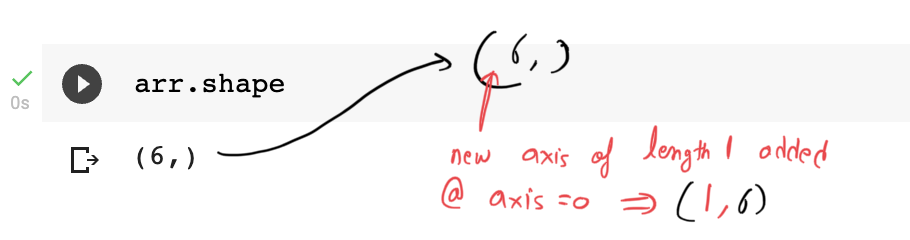

Here, the shape of array is (6,)

- We only have one axis i.e. axis = 0.

When we expand dimension with `axis =0`, 
- it add 1 to dimension @ axis = 0 
- Shape becomes (1, 6) from (6,)
- i.e. 1 is padded at the given axis location

Let's expand dims @ axis = 1 

In [ ]:
arr2 = np.expand_dims(arr, axis = 1)
arr2

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
arr2.shape

(6, 1)

Notice that, 
- as we provided `axis =1` in argument,
- It expanded the shape along axis =1 i.e 1 was appened @ axis 1.
- Hence, shape become (6,1) from (6,)

We can also do same thing using `np.newaxis`

#### `np.newaxis`

- passed as a parameter to the array.

Let's see how it works

In [ ]:
arr = np.arange(6)

In [ ]:
arr[np.newaxis, :] #equivalent to np.expand_dims(arr, axis =0)

array([[0, 1, 2, 3, 4, 5]])

We basically passed `np.newaxis` at the axis position where we want to add an axis

- In `arr[np.newaxis, : ]`,
    - we passed it @ axis =0, hence shape 1 was added @ axis = 0
    - and therefore, shape became (1, 6)

In [ ]:
arr[:, np.newaxis] # equivalent to np.expand_dims(arr, axis = 1 )

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

#### What if we want to reduce the number of dimensions? 

We can use `np.squeeze` for reducing the dimensions

#### `np.sqeeze()`

- It removes the axis of length 1 from array.
- Inverse of `expand_dims`

Function signature: `np.squeeze(arr, axis)`

Documentation: https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html

In [ ]:
arr = np.arange(9).reshape(1,1,9)
arr

array([[[0, 1, 2, 3, 4, 5, 6, 7, 8]]])

In [ ]:
arr.shape

(1, 1, 9)

In [ ]:
arr1 = np.squeeze(arr)
arr1

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
arr1.shape

(9,)

Notice that
- it reduced the shape from (1,1,9) to (9,)
- it did so by removing the axis of length 1
- i.e. it removed axis 0 and 1.

We can also remove specific axis using the `axis` argument

In [ ]:
arr

array([[[0, 1, 2, 3, 4, 5, 6, 7, 8]]])

In [ ]:
arr.shape

(1, 1, 9)

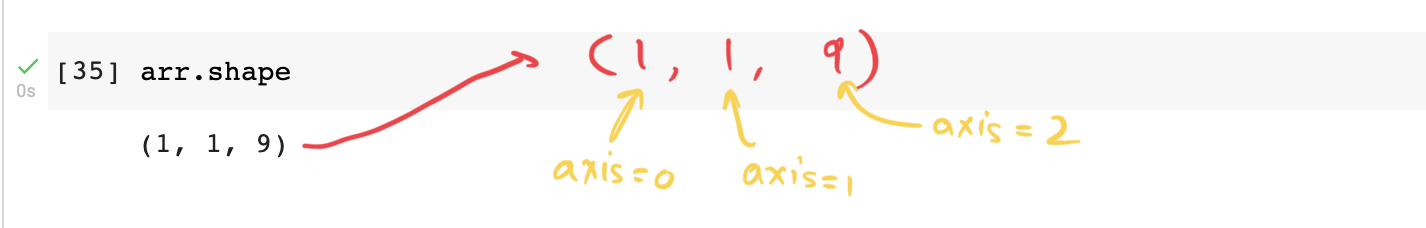

Let's remove axis = 1

In [ ]:
arr1 = np.squeeze(arr, axis = 1 )
arr1

array([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [ ]:
arr1.shape

(1, 9)

#### What if we try to remove 2nd axis?

In [ ]:
np.squeeze(arr, axis = 2 )

ValueError: ignored

It'll throw an array 
- as we are trying to remove non- one length axis

## Views vs Copies (Shallow vs Deep Copy) 

- Numpy **manages memory very efficiently**


- Which makes it really **useful while dealing with large datasets**


#### But how does it manage memory so efficiently?

- Let's create some arrays to understand what's happening in memory while using Numpy

In [ ]:
# We'll create np array

a = np.arange(4)
a

array([0, 1, 2, 3])

In [ ]:
# Reshape array `a` and store in b

b = a.reshape(2, 2)
b

array([[0, 1],
       [2, 3]])

#### Now we will make some changes to our original array `a`

In [ ]:
a[0] = 100
a

array([100,   1,   2,   3])

#### What will be values if we print array b ? 

In [ ]:
b

array([[100,   1],
       [  2,   3]])

#### Surprise Surprise!!

- Array **`b` got automatically updated**

### This is an example of Numpy using "Shallow Copy" of data

#### Now, What happens here?

- Numpy **re-uses data** as much as possible **instead of duplicating** it


- This helps Numpy to be efficient


#### When we created `b = a.reshape(2, 2)`

- Numpy **did NOT make a copy of `a` to store in `b`**, as we can clearly see


- It is **using the same data as in `a`**


- It **just looks different (reshaped)** in `b`


- That is why, **any changes in `a` automatically gets reflected in `b`**


#### How data is stored using Numpy?

- Variable **does NOT directly point to data** stored in memory


- There is something called **Header** in-between


### What does Header do?

- **Variable points to header** and **header points to data** stored in memory


- Header stores **information about data** - called **Metadata**


#### `a` is pointing to Metadata about our data `[0, 1, 2, 3]`, which may include:

- **How many values** we have --> 4


- What is the **Data Type** of data --> `int`


- What's the **Shape** --> `(4,)`

- What's the **stride** i.e. step size --> 1


#### When we do `b = a.reshape(2, 2)`

- Numpy **does NOT duplicate the data** pointed to by `a`


- It **uses the same data**


- And **create a New header for `b`** that **points to the same data** as pointed to by `a`


#### `b` points to a new Header having different values of Metadata of the same data:

- **Number of values** --> 4

- **Data Type** --> `int`

- **Shape** --> `(2, 2)`

- **Stride** i.e. step size --> 1


#### That is why:

- When data is accessed using `a`, it gives data in shape `(4,)`

- And when data is accessed using `b`, it gives same data in shape `(2, 2)`



#### This helps Numpy to save time and space - Making it efficient

### Now, Let's see an example where Numpy will create a "Deep Copy" of data

#### Now, What if we do this?


[Numpy metadata internals](https://numpy.org/devdocs/dev/internals.html)

In [ ]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [ ]:
# Create `c`

c = a + 2
c

array([2, 3, 4, 5])

In [ ]:
# We make changes in a

a[0] = 100
a

array([100,   1,   2,   3])

In [ ]:
c

array([2, 3, 4, 5])

#### As we can see, `c` did not get affected on changing `a`

- Because it is an operation


- A more **permanent change in data** 


- So, Numpy **had to create a separate copy for `c`** - i.e., **deep copy of array `a` for array `c`**


### Conclusion:

- Numpy is able to **use same data** for **simpler operations** like **reshape** ---> **Shallow Copy**


- It creates a **copy of data** where operations make **more permanent changes** to data ---> **Deep Copy**


#### Be careful about this while writing code using Numpy 

#### Is there a way to check whether two arrays are sharing memory or not? Yes, there is 

`np.shares_memory()` function to the rescue!!


In [ ]:
a= np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [ ]:
np.shares_memory(a,b)

True

Notice that Slicing creates shallow copies.

#### Why does slicing create shallow copies ? 

Rememeber the stride param of the header.
- Stride is nothing but the step size.

For Array `a`, we have a stride of 1.

For creating array b,
- we are slicing array a by 2 i.e. stride 2.
- So, it creates a new header for array b with stride = 2 while pointing to the original data 

In [ ]:
b[0] = 2
b

array([2, 2, 4, 6, 8])

In [ ]:
a

array([2, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Notice how change in b also changed the value in array a

Let's check with deep copy

In [ ]:
a 

array([2, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
b = a +2 

In [ ]:
np.shares_memory(a,b)

False

***

We learnt how **`.reshape`** and **Slicing returns a view** of the original array 
- i.e. Any changes made in original array will be reflected in the new array.

However, we saw that creating new array using 
- **masking** or **array operation returns deep copy** of the array.
- Any changes made in new array are not reflected in the original array.

Numpy also provides us with few functions to make shallow/ deep copy

#### How to make shallow copy? 

Numpy provides us with `.view()` function which returns view of an array

#### `.view()`

Returns view of the original array

- Any changes made in new array will be reflected in original array.

Function documentation: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.view.html



In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
view_arr = arr.view()
view_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
view_arr[4] = 420
view_arr

array([  0,   1,   2,   3, 420,   5,   6,   7,   8,   9])

In [ ]:
arr

array([  0,   1,   2,   3, 420,   5,   6,   7,   8,   9])

Notice that changes in view array are reflected in original array.

#### How do we make deep copy ? 

Numpy has `.copy()` function for that purpose

#### `.copy()`

Returns copy of the array.

Documentation (`.copy()`): https://numpy.org/doc/stable/reference/generated/numpy.ndarray.copy.html#numpy.ndarray.copy

Documentation: (`np.copy()`): https://numpy.org/doc/stable/reference/generated/numpy.copy.html

In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
copy_arr = arr.copy()
copy_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Let's modify the content of copy_arr and check whether it modified the original array as well

In [ ]:
copy_arr[3] = 45
copy_arr

array([ 0,  1,  2, 45,  4,  5,  6,  7,  8,  9])

In [ ]:
arr 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Notice that**
- The content of original array were not modified as we changed our copy array.





#### What are object arrays ? 

Object arrays are basically array of any python datatype. 



Documentation: https://numpy.org/devdocs/reference/arrays.scalars.html#numpy.object_

In [ ]:
arr = np.array([1, 'm', [1,2,3]], dtype = 'object')
arr

array([1, 'm', list([1, 2, 3])], dtype=object)

#### But arrays are suppoed to be homogeous data. How is it storing data of various types?

Remember that everything is object in python. 



Just like python list,
- The data actually **stored** in object arrays are **references to Python objects**, not the objects themselves. 

Hence, their elements need not be of the same Python type.

**As every element in array is an object. Hence, the dtype = object.**

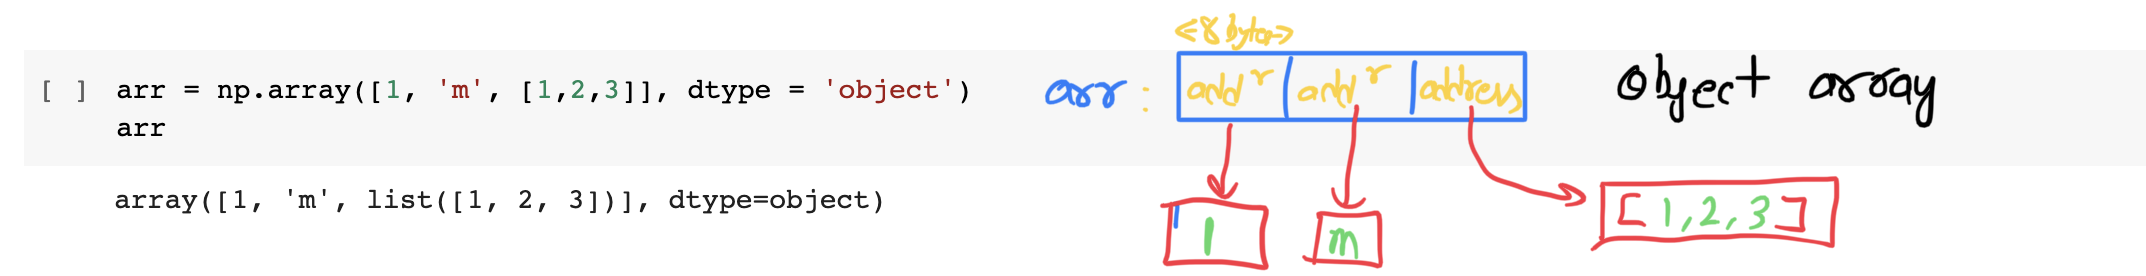

Let's make a copy of object array and check whether it returns a shallow copy or deep copy.

In [ ]:
copy_arr = arr.copy()

In [ ]:
copy_arr

array([1, 'm', list([1, 2, 3])], dtype=object)

Now, let's try to modify the list elements in copy_arr

In [ ]:
copy_arr[2][0] = 999

In [ ]:
copy_arr

array([1, 'm', list([999, 2, 3])], dtype=object)

Let's see if it changed the original array as well

In [ ]:
arr

array([1, 'm', list([999, 2, 3])], dtype=object)

It did change the original array.

Hence, **`.copy()` will return shallow copy when copying elements of array in object array.**

Any change in the 2nd level elements of array will be reflected in original array as well.

#### So, how do we create deep copy then ? 

We can do so using `copy.deepcopy()` method

#### `copy.deepcopy()`

Returns the deep copy of array

Documentation: https://docs.python.org/3/library/copy.html#copy.deepcopy

In [ ]:
import copy

In [ ]:
arr = np.array([1, 'm', [1,2,3]], dtype = 'object')
arr

array([1, 'm', list([1, 2, 3])], dtype=object)

Let's make a copy using `deepcopy()`

In [ ]:
copy = copy.deepcopy(arr)

In [ ]:
copy

array([1, 'm', list([1, 2, 3])], dtype=object)

Let's modify the array inside copy array

In [ ]:
copy[2][0] = 999

In [ ]:
copy

array([1, 'm', list([999, 2, 3])], dtype=object)

In [ ]:
arr

array([1, 'm', list([1, 2, 3])], dtype=object)

Notice that,

- the changes in copy array didn't reflect back to original array.

`copy.deepcopy()` **returns deep copy of an array.**

#### Summarizing
- `.view()` returns shallow copy of array
- `.copy()` returns deep copy of an array except for object type array
- `copy.deepcopy()` returns deep copy of an array.
